In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Jusoor/dset.csv'

In [ ]:
df = pd.read_csv( dataset_path)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df = df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales' , 'Name' , 'Rank'], axis=1)
df

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01
16595,PS2,2008.0,Racing,Activision,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.01


In [ ]:
df

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.74
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
4,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.01
16594,GC,2003.0,Shooter,Infogrames,0.01
16595,PS2,2008.0,Racing,Activision,0.01
16596,DS,2010.0,Puzzle,7G//AMES,0.01


In [ ]:
df1 = df
df1=df1.groupby(['Platform'])['Global_Sales'].sum().reset_index()
df1= df1.sort_values('Global_Sales' , ascending= False)
df1

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


In [ ]:
df2=df
df2=df2.groupby(['Genre'])['Global_Sales'].sum().reset_index()
df2= df2.sort_values('Global_Sales' , ascending= False)
df2

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


In [ ]:
df3 = df
df3=df3.groupby(['Year'])['Global_Sales'].sum().reset_index()
df3= df3.sort_values('Global_Sales' , ascending= False)
df3

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


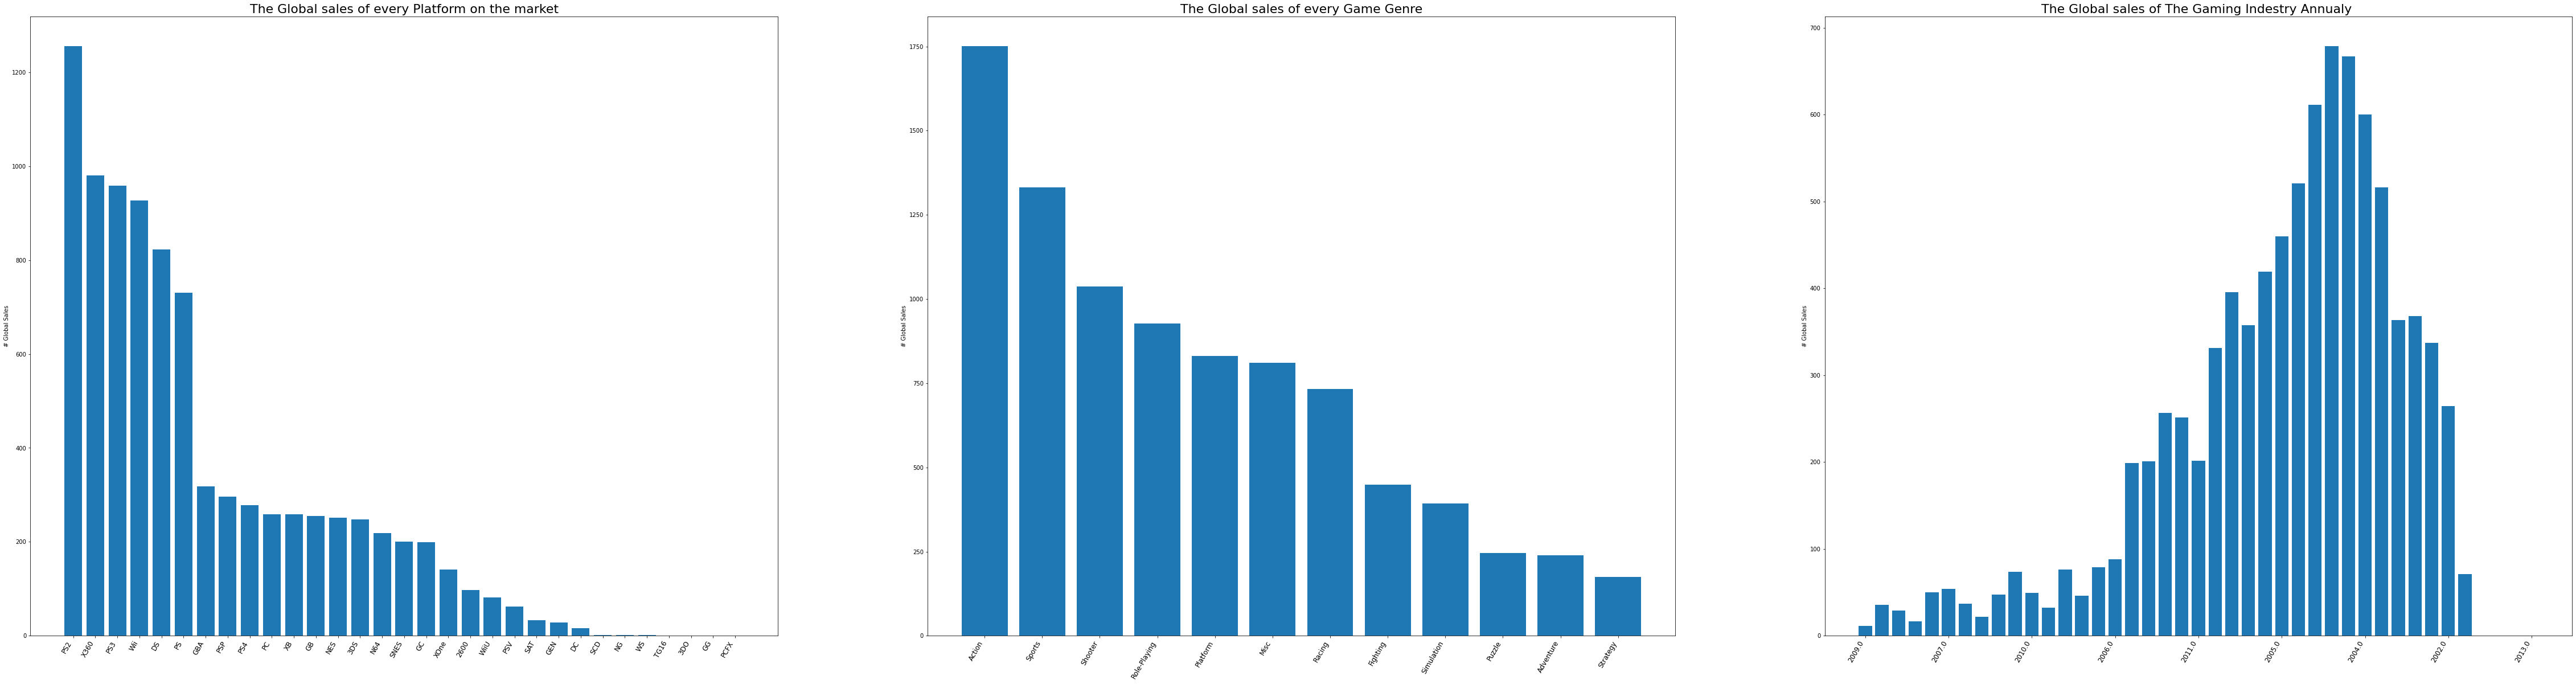

In [ ]:
fig = plt.figure(figsize = (80,20))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.bar(df1['Platform'] , df1['Global_Sales'])
ax1.set_xticklabels(df1['Platform'] , rotation = 60 , horizontalalignment = 'right' , fontsize = '12')
ax1.set_title('The Global sales of every Platform on the market' , fontsize= 22)
ax1.set_ylabel('# Global Sales')

ax2.bar(df2['Genre'] , df2['Global_Sales'])
ax2.set_xticklabels(df2['Genre'] , rotation = 60 , horizontalalignment = 'right' , fontsize = '12')
ax2.set_title('The Global sales of every Game Genre' , fontsize= 22)
ax2.set_ylabel('# Global Sales')

ax3.bar(df3['Year'] , df3['Global_Sales'])
ax3.set_xticklabels(df3['Year'] , rotation = 60 , horizontalalignment = 'right' , fontsize = '12')
ax3.set_title('The Global sales of The Gaming Indestry Annualy ' , fontsize= 22)
ax3.set_ylabel('# Global Sales')
plt.show()

In [ ]:
df = df.dropna(axis=0)

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category').cat.codes

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
X = df.drop(['Global_Sales']  , axis = 1)
Y = df['Global_Sales']
df

,Platform,Year,Genre,Publisher,Global_Sales
0,26,2006,10,359,82.74
1,11,1985,4,359,40.24
2,26,2008,6,359,35.82
3,26,2009,10,359,33.00
4,5,1996,7,359,31.37
...,...,...,...,...,...
16593,6,2002,4,269,0.01
16594,7,2003,8,241,0.01
16595,16,2008,6,21,0.01
16596,4,2010,5,8,0.01


In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)

In [ ]:
df= pd.DataFrame(scaledX)

In [ ]:
df

,0,1,2,3
0,0.866667,0.650,0.909091,0.624348
1,0.366667,0.125,0.363636,0.624348
2,0.866667,0.700,0.545455,0.624348
3,0.866667,0.725,0.909091,0.624348
4,0.166667,0.400,0.636364,0.624348
...,...,...,...,...
16286,0.200000,0.550,0.363636,0.467826
16287,0.233333,0.575,0.727273,0.419130
16288,0.533333,0.700,0.545455,0.036522
16289,0.133333,0.750,0.454545,0.013913


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linearRegr = LinearRegression()

In [ ]:
linearRegr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linearRegr.predict(x_test)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.4484436409935233
